<a href="https://colab.research.google.com/github/leilaabdel/breast-cancer-multiomic-networks/blob/main/notebooks/network_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd


In [12]:
#Make sure to change this for your own paths
ROOT = '/content/drive/My Drive/Masters-Program/courses/ece-735-networks/breast-cancer-pathways-networks'
BREAST_CANCER_NETWORK_PATH = ROOT + '/data/combined-metabolite-protein-list/metabolite-protein-interact.csv'

In [13]:
G_undir = pickle.load(open(ROOT + '/data/undirected_graph.pickle' , 'rb'))
G_dir = pickle.load(open(ROOT + '/data/directed_graph.pickle' , 'rb'))

## Clustering

In [14]:
# I read the documentation for this function and it implmenets the Chung Laplacian Equation
L_C = nx.directed_combinatorial_laplacian_matrix(G_dir)


In [15]:
import scipy
# w are the eigenvalues
# v are the eigenvectors
w, v = scipy.linalg.eig(L_C)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


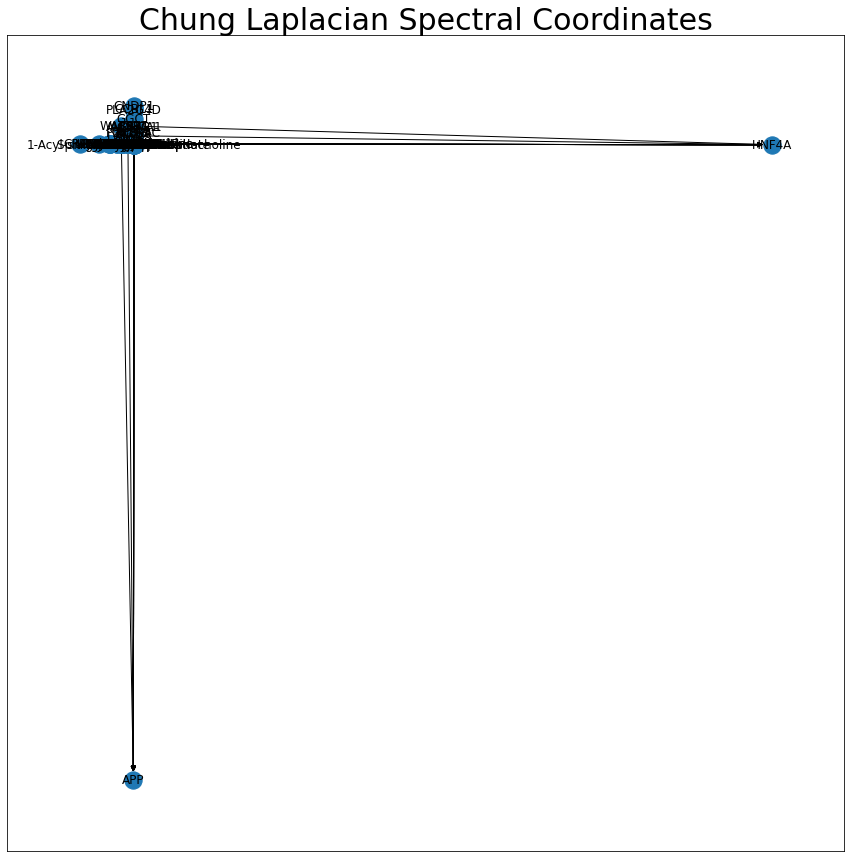

In [20]:
x = v[:,1]
y = v[:,2]
ns = list(G_dir.nodes())
spectral_coordinates = {ns[i] : [float(x[i]), float(y[i])] for i in range(len(x))}
figure = plt.figure(figsize=(15,15))
nx.draw_networkx(G_dir , pos = spectral_coordinates)
plt.title("Chung Laplacian Spectral Coordinates" , fontsize=30)
plt.show()


In [21]:
X = []
for i , j in spectral_coordinates.values():
  X.append((i,j))

In [22]:
X = np.asarray(X)
X.shape

(276, 2)

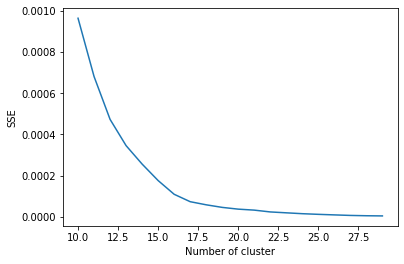

In [26]:
from sklearn.cluster import KMeans
data = pd.DataFrame()

sse = {}
for k in range(10, 30):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [27]:
kmeans = KMeans(n_clusters=16, random_state=0).fit(X)
groupings = kmeans.labels_

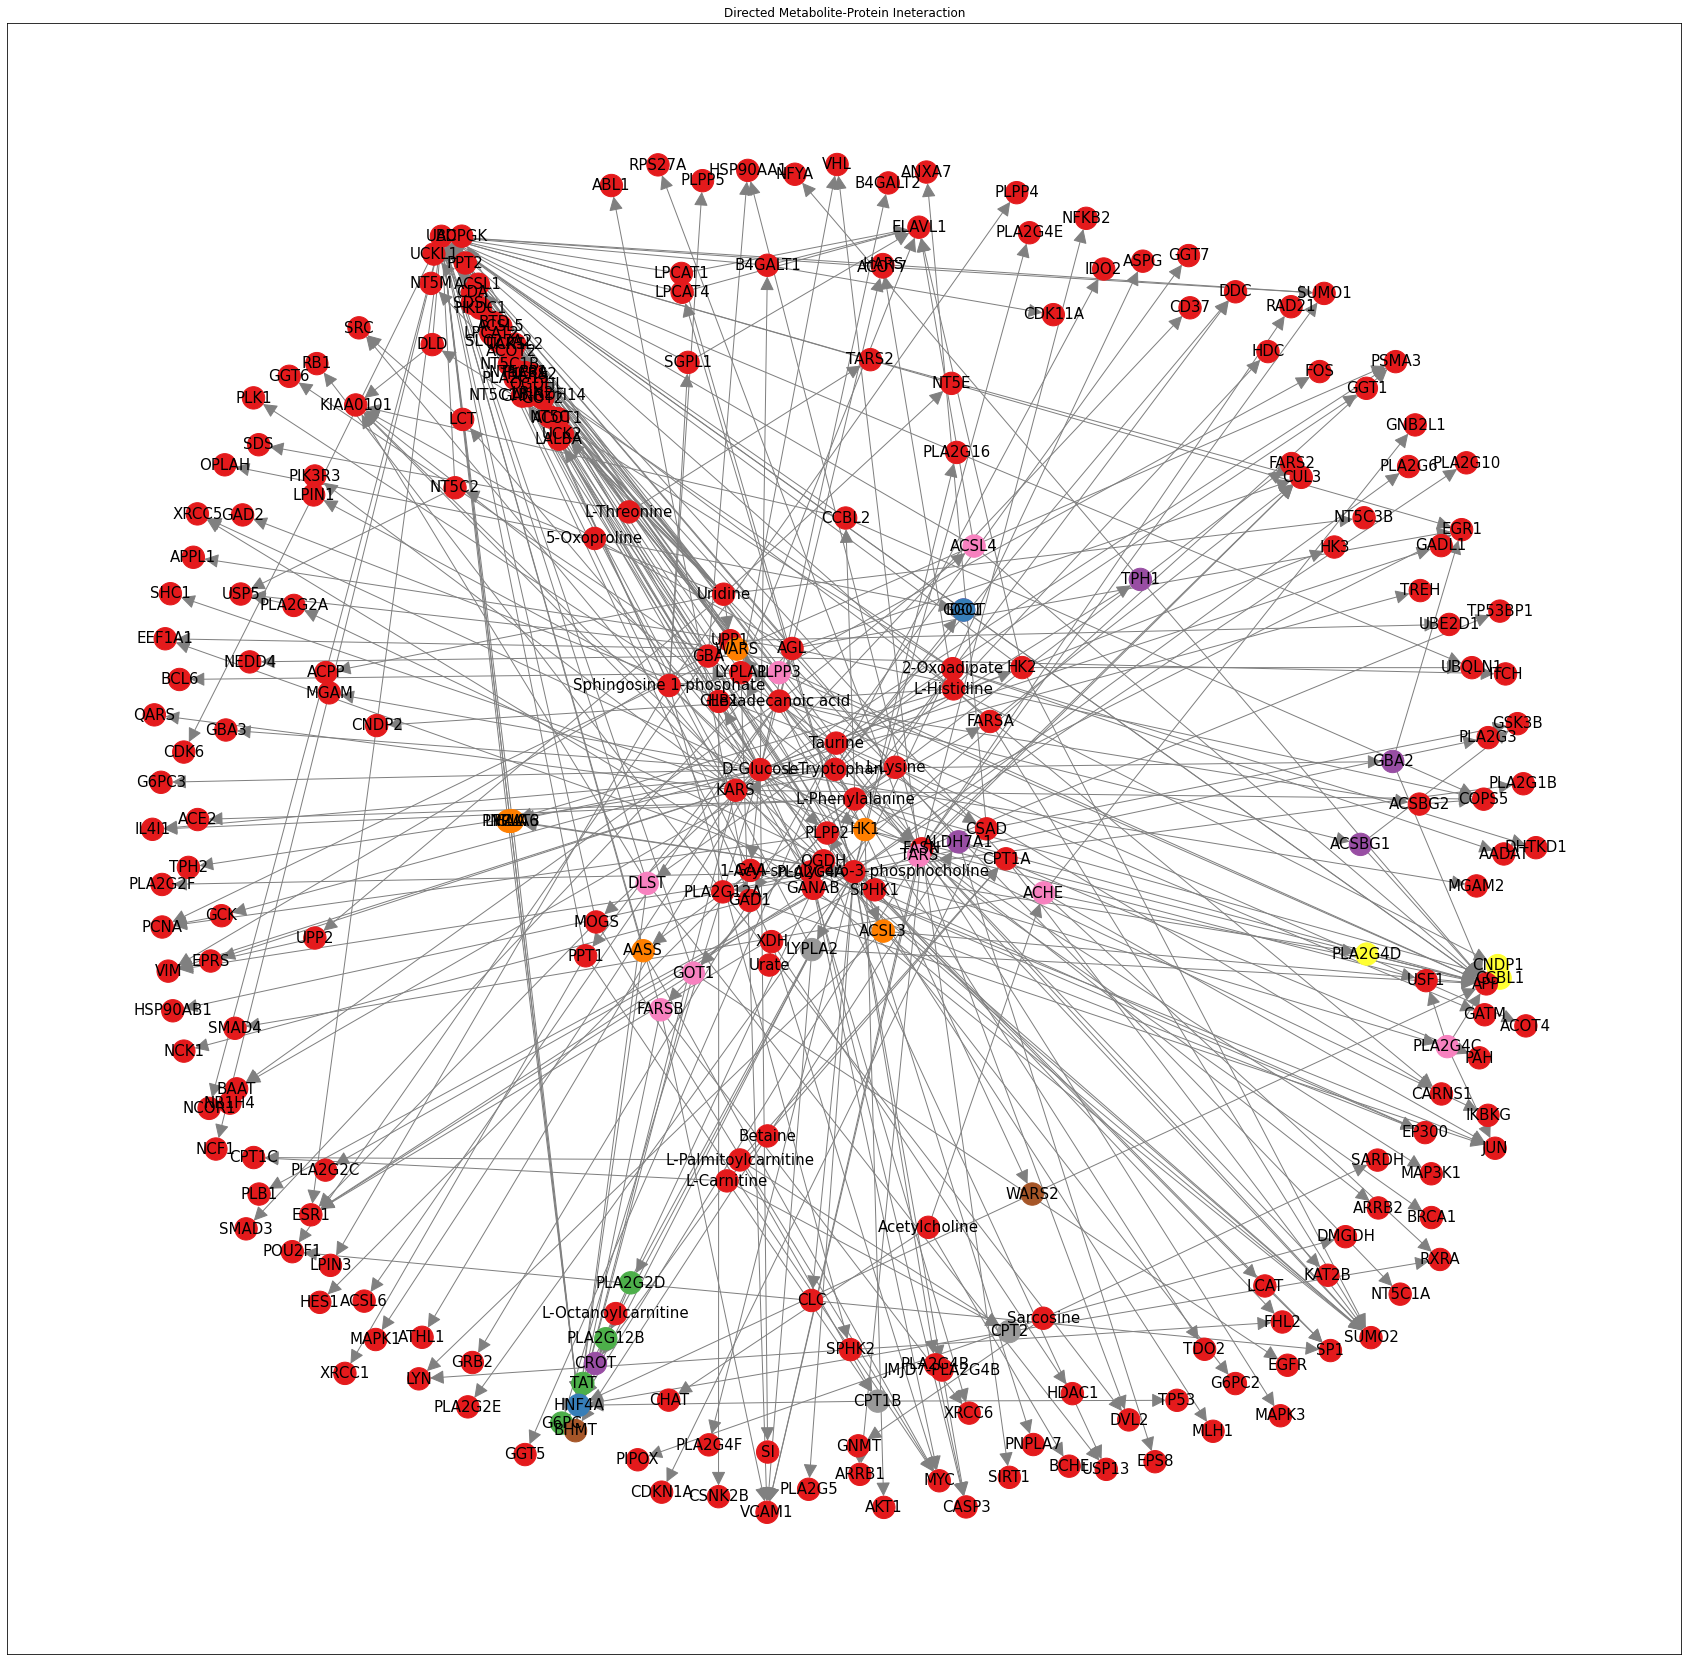

In [32]:
fig = plt.figure(figsize=(30,30))
nx.draw_networkx(G_dir , font_size=15, cmap='Set1', edge_color='gray', node_size=500, arrowsize=30 , node_color=groupings )
KEGG_ID = "HSA05224"
plt.title("Directed Metabolite-Protein Ineteraction")
plt.savefig('directed-graph.eps', dpi=300)

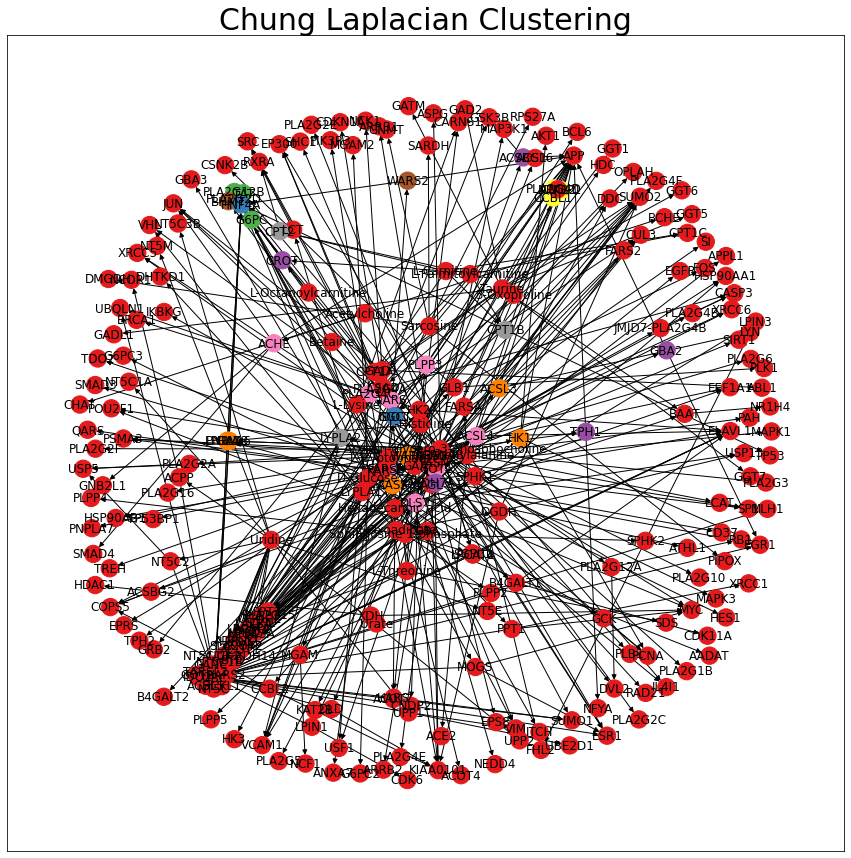

In [29]:
figure = plt.figure(figsize=(15,15))
nx.draw_networkx(G_dir , node_color=groupings , cmap='Set1')
plt.title("Chung Laplacian Clustering" , fontsize=30)
plt.show()

## Undirected Graph

In [37]:
A = nx.adjacency_matrix(G_undir)

In [38]:
a_shape = A.shape
a_diagonals = A.sum(axis=1)
D = scipy.sparse.spdiags(a_diagonals.flatten(),
                         [0],
                         a_shape[0],
                         a_shape[1],
                         format='csr')

In [39]:
L = (D - A)

In [40]:
# w are the eigenvalues
# v are the eigenvectors
w, v = scipy.linalg.eig(L.todense())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


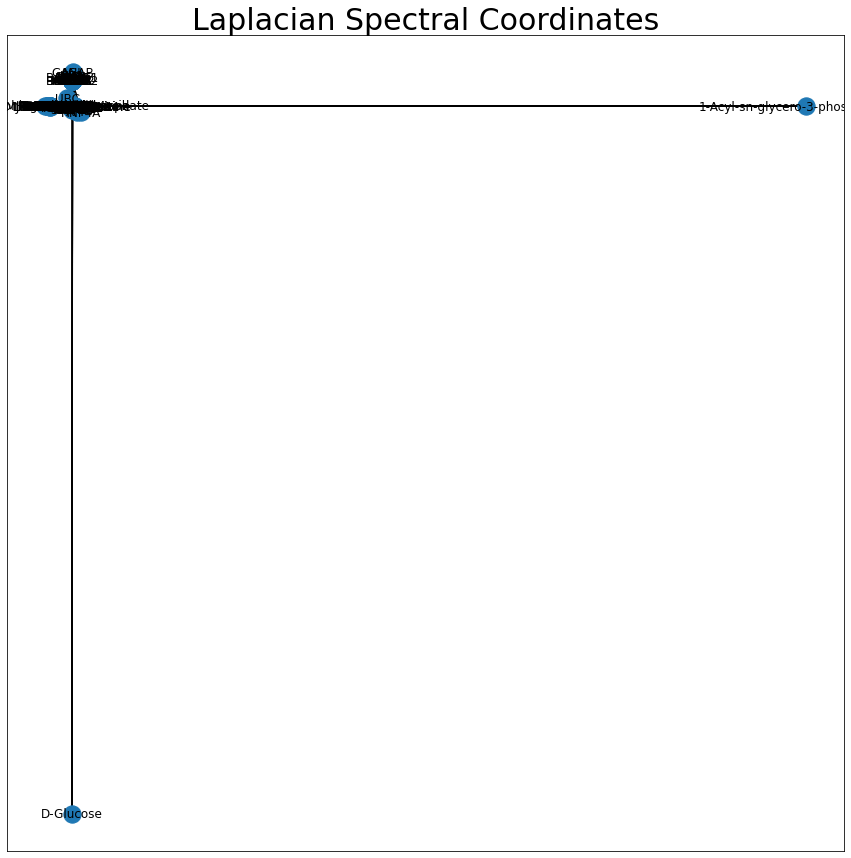

In [41]:
x = v[:,1]
y = v[:,2]
ns = list(G_undir.nodes())
spectral_coordinates = {ns[i] : [float(x[i]), float(y[i])] for i in range(len(x))}
figure = plt.figure(figsize=(15,15))
nx.draw_networkx(G_undir , pos = spectral_coordinates)
plt.title("Laplacian Spectral Coordinates" , fontsize=30)
plt.show()

# As you can see there are more connected nodes over others

In [42]:
X = []
for i , j in spectral_coordinates.values():
  X.append((i,j))

In [43]:
X = np.asarray(X)
X.shape

(276, 2)

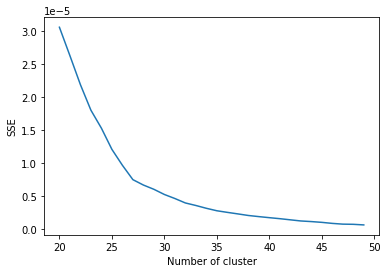

In [44]:
from sklearn.cluster import KMeans
data = pd.DataFrame()

sse = {}
for k in range(20, 50):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [47]:
kmeans = KMeans(n_clusters=27, random_state=0).fit(X)
groupings = kmeans.labels_

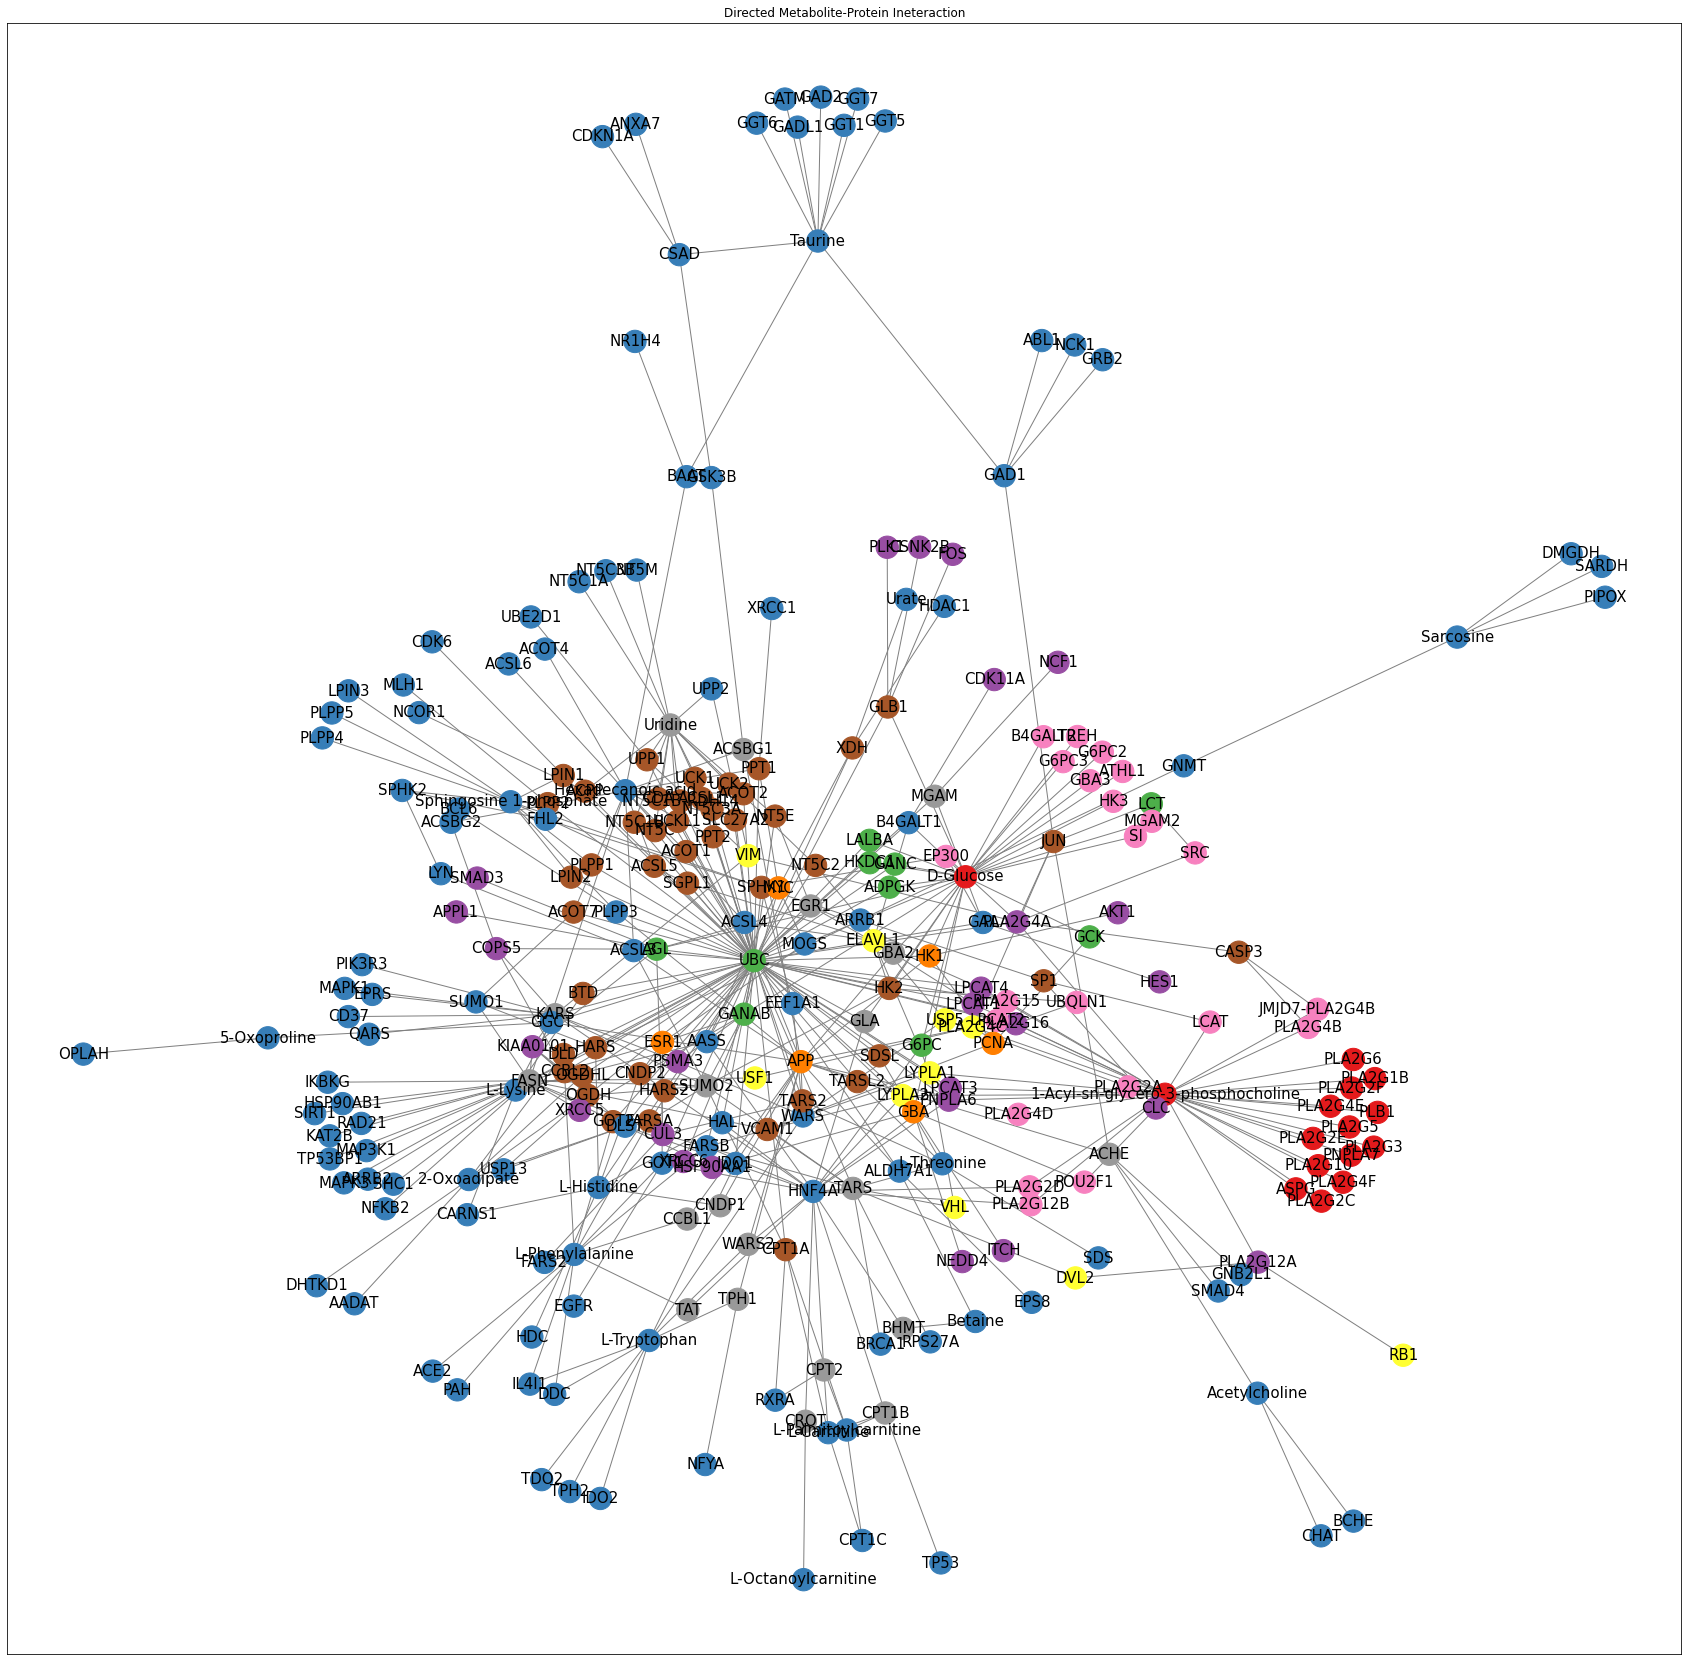

In [48]:
fig = plt.figure(figsize=(30,30))
nx.draw_networkx(G_undir , font_size=15, cmap='Set1', edge_color='gray', node_size=500, arrowsize=30 , node_color=groupings )
KEGG_ID = "HSA05224"
plt.title("Directed Metabolite-Protein Ineteraction")
plt.savefig('directed-graph.eps', dpi=300)

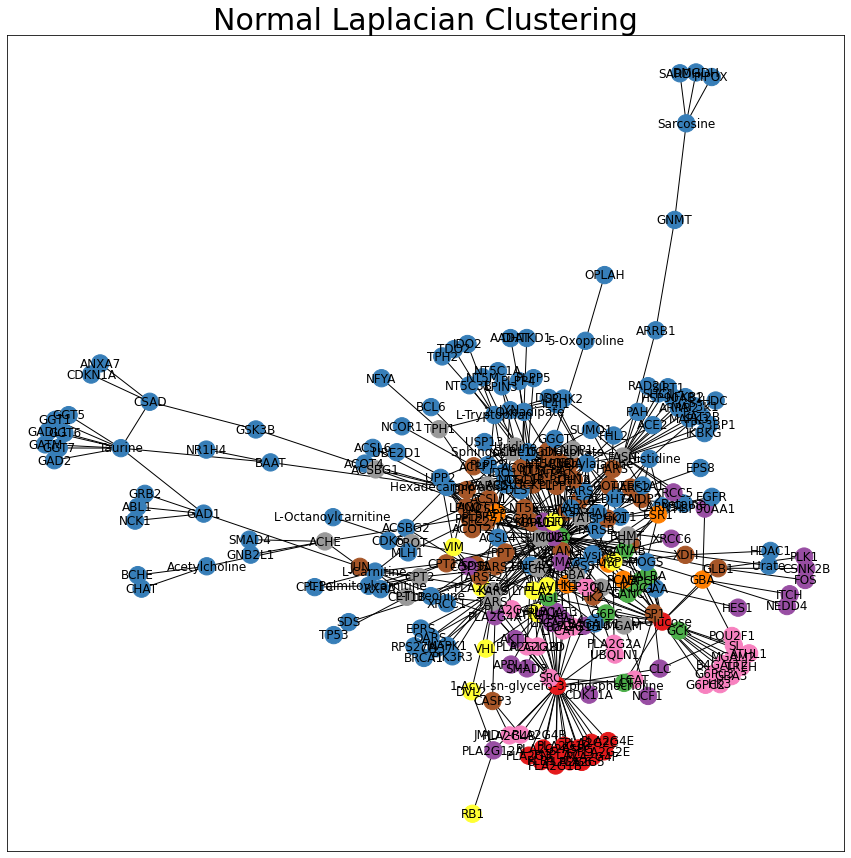

In [ ]:
figure = plt.figure(figsize=(15,15))
nx.draw_networkx(G_undir, node_color=groupings , cmap='Set1')
plt.title("Normal Laplacian Clustering" , fontsize=30)
plt.show()